In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for encoding
from sklearn.preprocessing import LabelEncoder
# for train test splitting
from sklearn.model_selection import train_test_split
# for decision tree object
from sklearn.tree import DecisionTreeClassifier
# for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
# for visualizing
from sklearn.tree import plot_tree

In [100]:
df = pd.read_csv('/Users/spandanarajamahanthi/Downloads/gender_classification_v7 (1).csv',header=0)
print(df)

    long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0           1               11.8                 6.1          1          0   
1           0               14.0                 5.4          0          0   
2           0               11.8                 6.3          1          1   
3           0               14.4                 6.1          0          1   
4           1               13.5                 5.9          0          0   
5           1               13.0                 6.8          1          1   
6           1               15.3                 6.2          1          1   
7           0               13.0                 5.2          0          0   
8           1               11.9                 5.4          1          0   
9           1               12.1                 5.4          0          0   
10          0               12.5                 5.4          1          1   
11          1               15.5                 5.8          1 

In [101]:
df.shape

(58, 8)

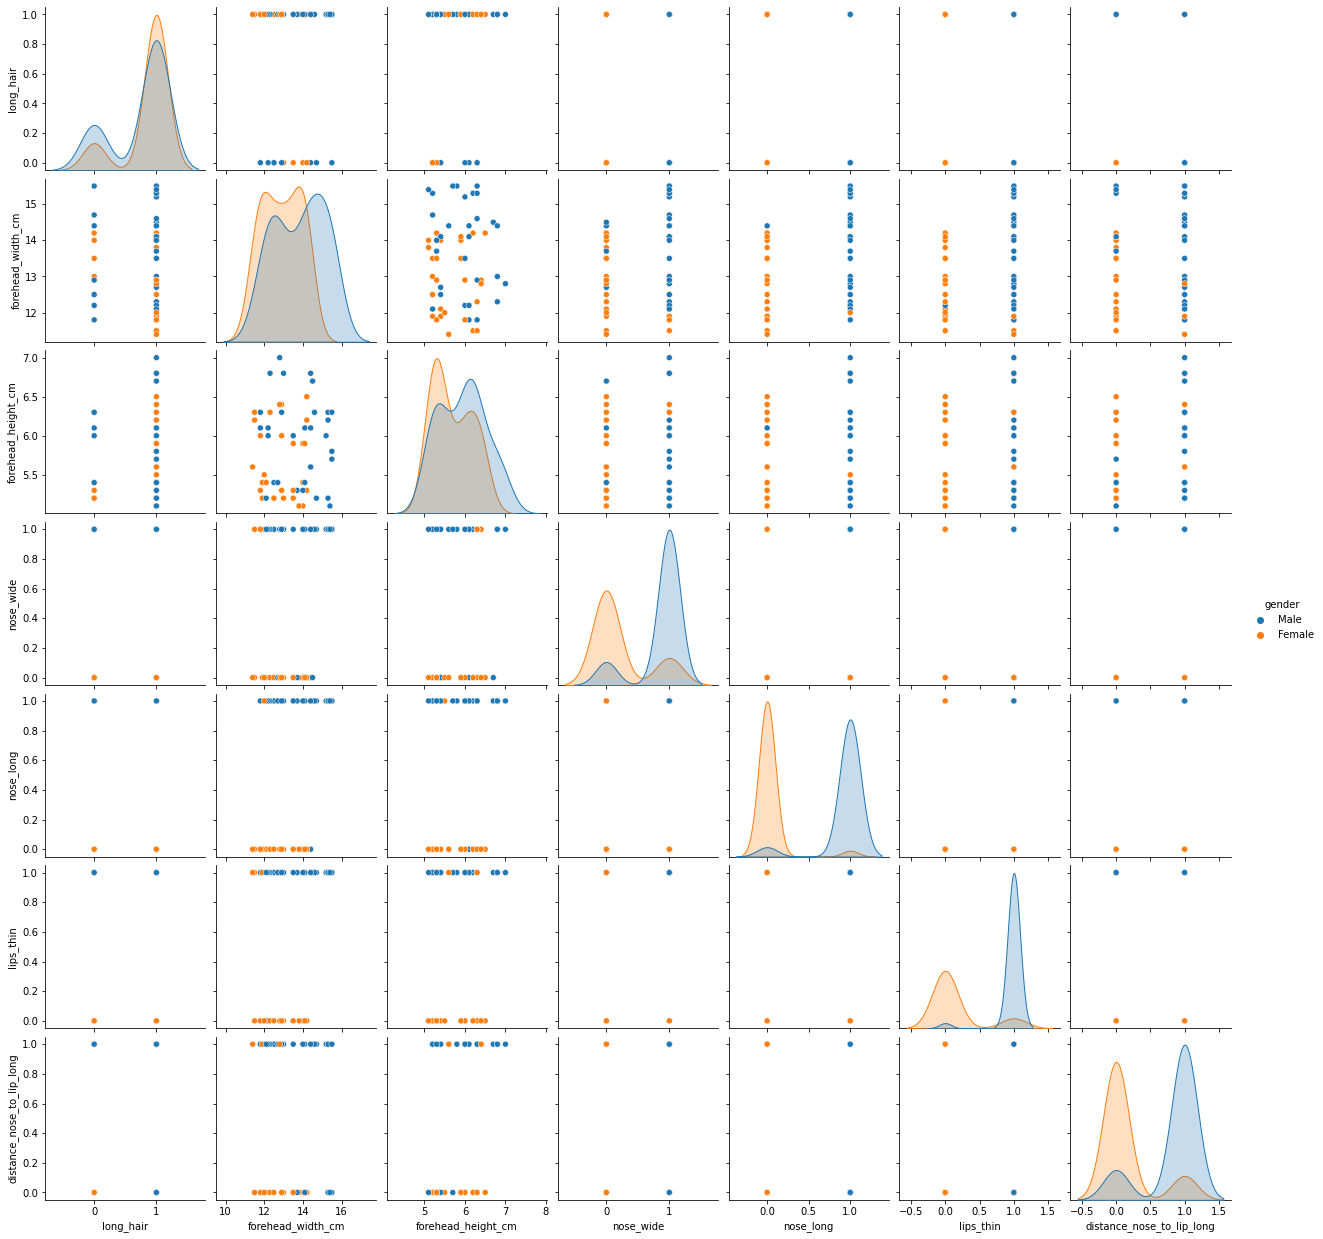

In [102]:
sns.pairplot(data=df, hue='gender')
plt.show()

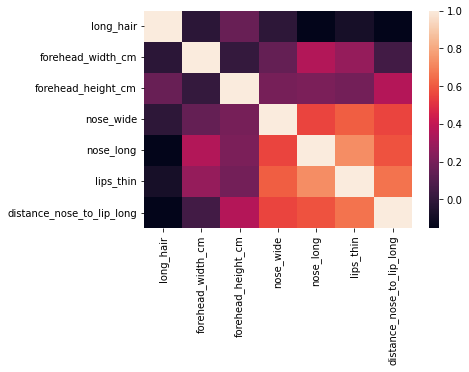

In [103]:
#correlation matrix
sns.heatmap(df.corr())
plt.savefig("one.png")

In [104]:
target = df['gender']
df1 = df.copy()
df1 = df1.drop('gender', axis =1)

In [105]:
df1.shape

(58, 7)

In [106]:
df.shape

(58, 8)

In [107]:
target

0       Male
1     Female
2       Male
3       Male
4     Female
5       Male
6       Male
7     Female
8     Female
9     Female
10      Male
11      Male
12      Male
13      Male
14    Female
15      Male
16      Male
17    Female
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25    Female
26    Female
27    Female
28      Male
29      Male
30      Male
31      Male
32    Female
33    Female
34      Male
35      Male
36    Female
37    Female
38    Female
39      Male
40    Female
41      Male
42      Male
43    Female
44      Male
45      Male
46    Female
47      Male
48    Female
49    Female
50      Male
51    Female
52    Female
53    Female
54      Male
55    Female
56      Male
57      Male
Name: gender, dtype: object

In [108]:
X = df1

In [109]:
y=target

In [110]:
le = LabelEncoder()

In [111]:
target = le.fit_transform(target)

In [112]:
y=target

In [113]:
X_train, X_test, y_tarin, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [114]:
print("Training split input:", X_train.shape)
print("Testing split input:", X_test.shape)

Training split input: (46, 7)
Testing split input: (12, 7)


In [115]:
# Defining the decision tree algorithm
dtree = DecisionTreeClassifier()

In [116]:
# fit the training data
dtree.fit(X_train,y_tarin)

DecisionTreeClassifier()

In [117]:
# Testing
y_pred = dtree.predict(X_test)

In [118]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [119]:
print('Classification report: \n', classification_report(y_test, y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



In [120]:
cm = confusion_matrix(y_test, y_pred)


In [121]:
cm

array([[5, 0],
       [1, 6]])

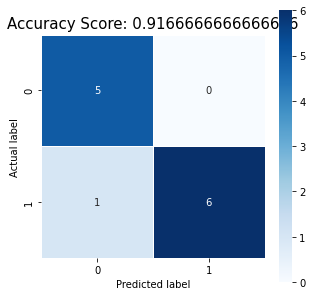

In [122]:
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test,y_test))
plt.title(all_sample_title, size = 15)
plt.savefig("one.png")

In [123]:
df1.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object')

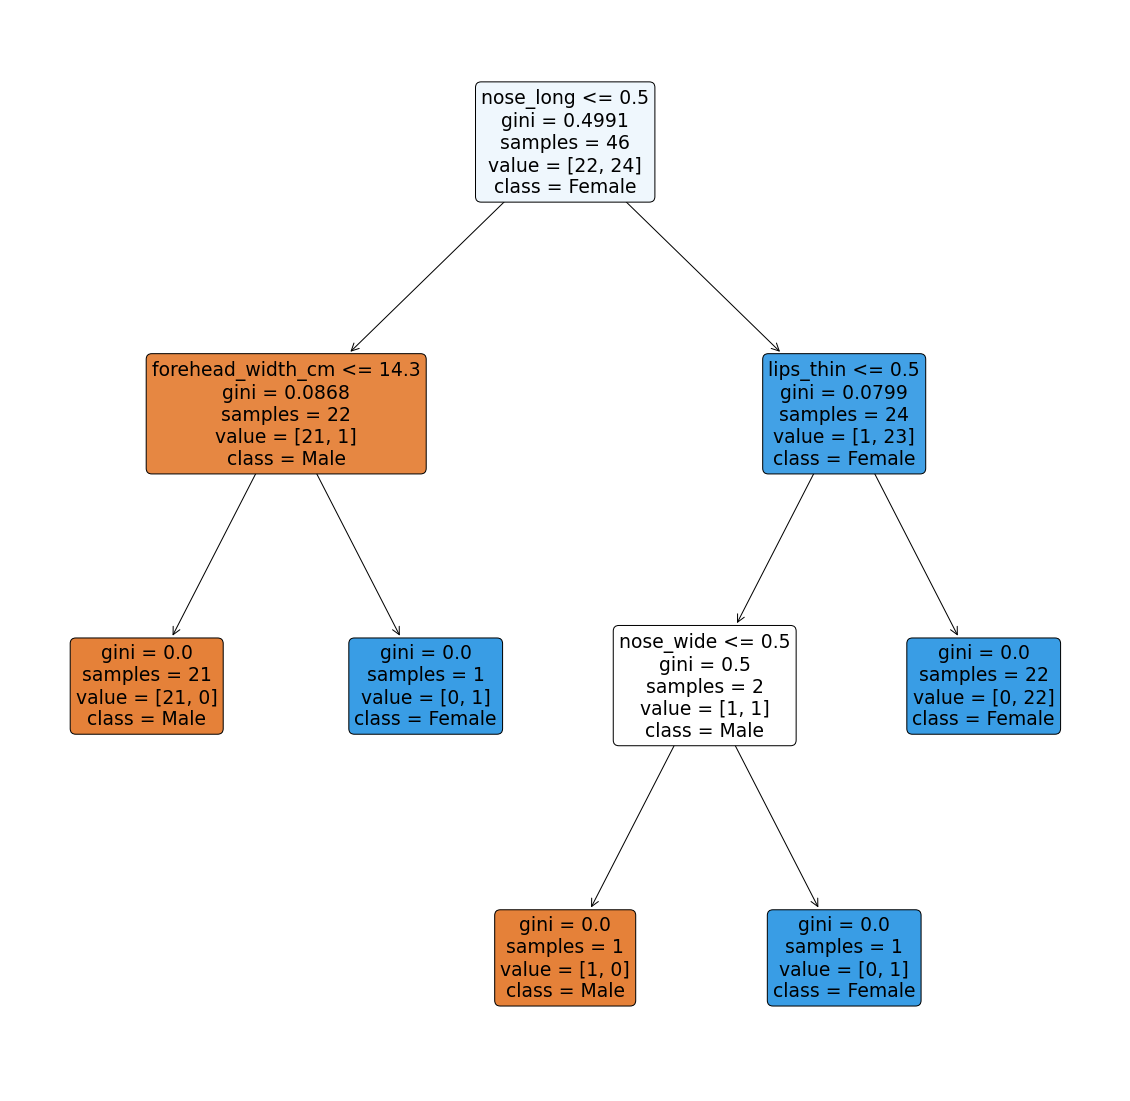

In [124]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["Male", "Female"] , filled = True , precision = 4, rounded = True)

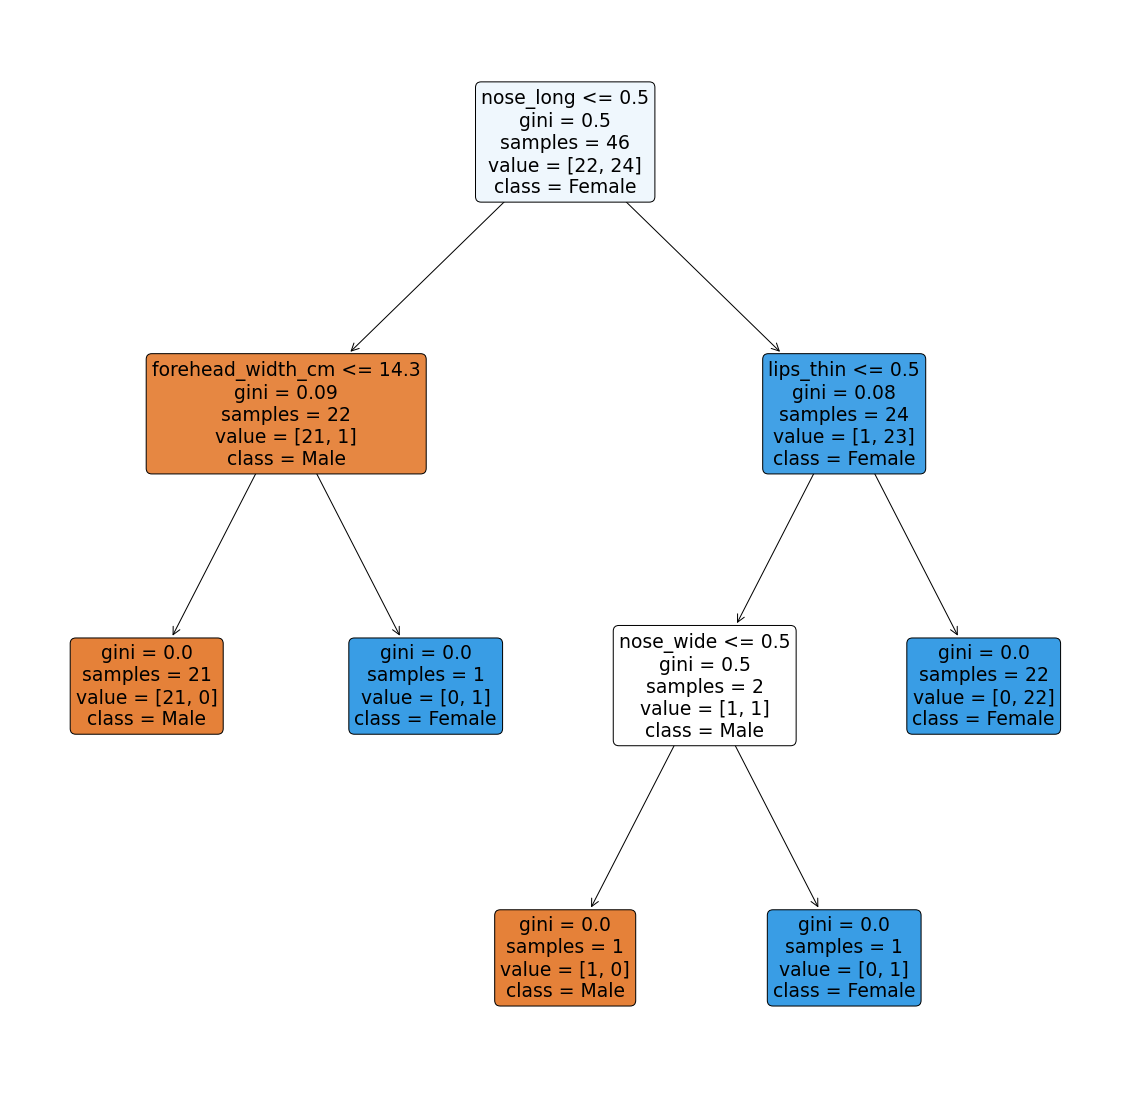

In [125]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["Male", "Female"] , filled = True , precision = 2, rounded = True)